# The Facade Design Pattern

### Problem

Imagine that you must make your `code work with` a broad set of objects that belong to `a sophisticated library or framework`(for ex., an application that needs to interact with various cloud services, such as storage, authentication, and notifications). Ordinarily, you’d need to initialize all of those objects, keep track of dependencies, execute methods in the correct order, and so on.

As a result, the business logic of your classes would become tightly coupled to the implementation details of 3rd-party classes, making it hard to comprehend and maintain.

### Solution

 the Facade design pattern is an interface between the client and the system. It hides the complexity of the system and isolates it from the client. It provides a higher-level interface so that a client doesn’t have to deal with all the subsystems of the system individually.

The Facade pattern essentially is an alternative, reduced or simplified interface to a set of other interfaces, abstractions and implementations within a system that may be full of complexity and/or tightly coupled.

**Key Components**

* **Facade Class**: Acts as an entry point, directing client requests and coordinating subsystem operations.
* **Additional Facades**: Created to avoid complexity, they segregate unrelated features, making the design more manageable for clients and other facades.
* **Complex Subsystem**: Comprises various objects requiring intricate handling, abstracted by the facade to streamline their functionality.
* **Subsystem Classes**: Unaware of the facade, these classes interact directly within the system, collaborating with each other for functionality.
* **Client**: Utilizes the facade to interact with the subsystem, avoiding direct calls to its objects.

**Facade UML Diagram**

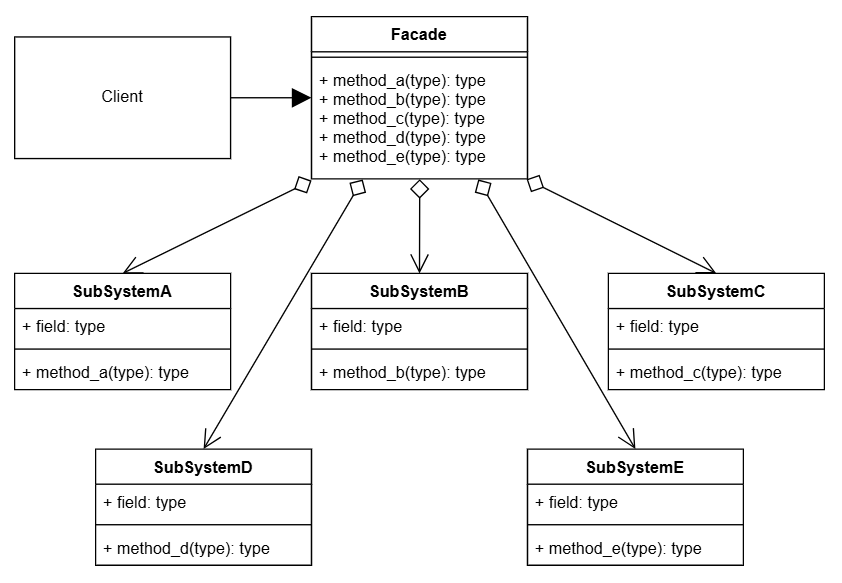

### Example 1

In [3]:
class SubSystemClassA:
    "A hypothetically complicated class"
    @staticmethod
    def method():
        "A hypothetically complicated method"
        return "A"

class SubSystemClassB:
    "A hypothetically complicated class"
    @staticmethod
    def method(value):
        "A hypothetically complicated method"
        return value

class SubSystemClassC:
    "A hypothetically complicated class"
    @staticmethod
    def method(value):
        "A hypothetically complicated method"
        return value

In [4]:
class Facade():
    "A simplified facade offering the services of subsystems"
    @staticmethod
    def sub_system_class_a():
        "Use the subsystems method"
        return SubSystemClassA().method()

    @staticmethod
    def sub_system_class_b(value):
        "Use the subsystems method"
        return SubSystemClassB().method(value)

    @staticmethod
    def sub_system_class_c(value):
        "Use the subsystems method"
        return SubSystemClassC().method(value)

In [5]:
# The Client
# call potentially complicated subsystems directly
print(SubSystemClassA.method())
print(SubSystemClassB.method("B"))
print(SubSystemClassC.method({"C": [1, 2, 3]}))

# or use the simplified facade
print(Facade().sub_system_class_a())
print(Facade().sub_system_class_b("B"))
print(Facade().sub_system_class_c({"C": [1, 2, 3]}))

A
B
{'C': [1, 2, 3]}
A
B
{'C': [1, 2, 3]}


### Example 2

Preparing food dish includes three processes like Cut the vegetables, Boil Vegetables, Fry vegetables. All these three processes are like three sub system classes. 

These above processes are not supposed to be available for client for some reason, so we have implemented facade for that called Cook.

So, our Client just need to call the Cook and ask to prepareDish.

In [38]:
class Cutter():
    def cutVegetables(self, ingredients)-> str:
        return f'All {ingredients} are cut'

class Boiler():
    def boilVegetables(self, ingredients)-> str:
        return f"All {ingredients} are boiled"

class Frier():
    def fry(self, ingredients)-> str:
        return f"All {ingredients} is mixed and fried."

In [36]:
from typing import Type

class Facade:
    def __init__(self, subsystem1: Type[Cutter]=None, subsystem2: Type[Boiler]=None, subsystem3: Type[Frier]=None)-> None:
        self.__subsystem1=subsystem1 if subsystem1 else Cutter()
        self.__subsystem2=subsystem2 if subsystem2 else Boiler()
        self.__subsystem3=subsystem3 if subsystem3 else Frier()
        
    def prepareDish(self, ingredients)->str:
        result="Let's cook :)"
        result+="".join([self.__subsystem1.cutVegetables(ingredients), self.__subsystem2.boilVegetables(ingredients), self.__subsystem3.fry(ingredients)])
        return result
        

In [39]:
ingredients=["Chicken","baby carrots","onion","basil"]
Facade().prepareDish(ingredients)

"Let's cook :)All ['Chicken', 'baby carrots', 'onion', 'basil'] are cutAll ['Chicken', 'baby carrots', 'onion', 'basil'] are boiledAll ['Chicken', 'baby carrots', 'onion', 'basil'] is mixed and fried."